In [3]:
import pandas as pd
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Charger le dataset
df = pd.read_csv("train.csv")
nlp = spacy.load('en_core_web_sm')

# Add custom stopwords
custom_stopwords = set(["custom", "stopwords", "list"])  # Add your custom stopwords
STOP_WORDS = STOP_WORDS.union(custom_stopwords)

In [5]:

def reduce_dataset(input_file, output_file, sample_size):
    # Charger le jeu de données original à partir du fichier CSV
    data = pd.read_csv(input_file)

    # Réduire le nombre de lignes en échantillonnant aléatoirement un sous-ensemble de données
    sampled_data = data.sample(n=sample_size, random_state=42)

    # Enregistrer le sous-ensemble de données réduit dans un nouveau fichier CSV
    sampled_data.to_csv(output_file, index=False)

    print(f"Le nouveau jeu de données avec {sample_size} lignes a été enregistré dans {output_file}")

# Utilisation de la fonction pour réduire le nombre de lignes
input_file = "train.csv"
output_file = "test.csv"
sample_size = 30000  



In [6]:
reduce_dataset(input_file, output_file, sample_size)


Le nouveau jeu de données avec 30000 lignes a été enregistré dans test.csv


In [7]:
df_test=pd.read_csv('test.csv')
df_test

,Y,text
0,1,finally made a significant breakthrough with a...
1,1,school was great today keepin my ambition and ...
2,1,swedish high school love ya ll xoxo matilda
3,0,only if we had actually done it
4,1,dairy queen amp amp x
...,...,...
29995,0,lolly hugs are you alright i wanted to text yo...
29996,0,holy shit i hope those two have a sense of hum...
29997,1,thanks
29998,0,why


In [8]:
# Function for text processing with spaCy
def preprocess_text_spacy(text):
    doc = nlp(text)
    
    # Tokenization, lemmatization, and removing stopwords and short tokens
    tokens = [token.lemma_.lower() for token in doc if token.text.lower() not in STOP_WORDS and len(token.text) > 2]
    
    return ' '.join(tokens)


In [9]:
# Apply the function to the 'text' column
df['processed_text_spacy'] = df_test['text'].apply(preprocess_text_spacy)
df['processed_text_spacy']

0          finally make significant breakthrough with sca...
1          school be great today keepin ambition and focu...
2                      swedish high school love xoxo matilda
3                                      only have actually do
4                                        dairy queen amp amp
                                 ...                        
1046338                                                  NaN
1046339                                                  NaN
1046340                                                  NaN
1046341                                                  NaN
1046342                                                  NaN
Name: processed_text_spacy, Length: 1046343, dtype: object

In [10]:
df = df.dropna(subset=['processed_text_spacy'])

In [11]:
# Reconstruct the corpus
corpus_spacy = ' '.join(df['processed_text_spacy'])
corpus_spacy


'finally make significant breakthrough with scaling issue be have some our site school be great today keepin ambition and focus sweet dream tweet heart xoxo swedish high school love xoxo matilda only have actually do dairy queen amp amp sorry miss you business business fergie texte she there thursday and now can seem find all the people follow the mixero contact search that biggie ugh last dayy her boo do like its okay tho ill get over be mean anyway cousin fandibulous that be cousin need add he myspace go take doggie get her staple remove wonder where should for lunch only get like minute today sighz lol know should try cheer you but loudofficeneighbor deserve what come he haha omg miami fri there george lee but with the kansas cummann today go fun go spend all day with bestie whhohoo hello paradise hehe one place would love visit fresh from amsterdam chocolate pretzel awesome like the city itself need holiday more love couch surfing get ready for all day date tomorrow out london have

In [12]:
# Number of unique tokens
unique_tokens_spacy = len(set(corpus_spacy.split()))
print("Nombre de tokens uniques avec spaCy :", unique_tokens_spacy)

Nombre de tokens uniques avec spaCy : 23449


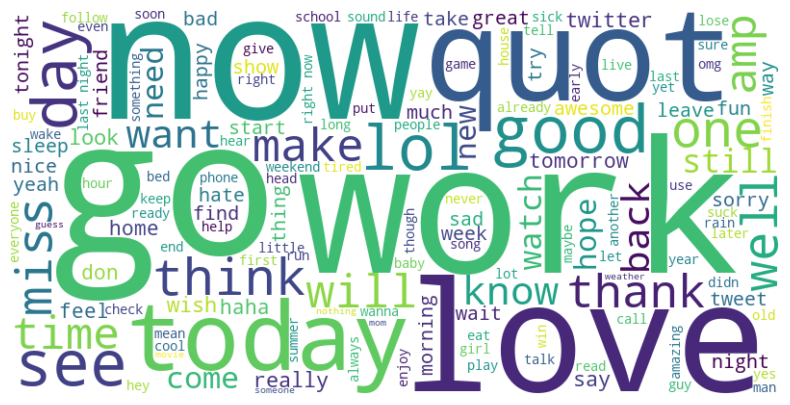

In [13]:
# Visualize the most frequent tokens with a WordCloud
wordcloud_spacy = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(corpus_spacy)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.axis('off')
plt.show()



In [14]:
# Use the processed column with spaCy
df['new_text_spacy'] = df['processed_text_spacy']
df['new_text_spacy']

0        finally make significant breakthrough with sca...
1        school be great today keepin ambition and focu...
2                    swedish high school love xoxo matilda
3                                    only have actually do
4                                      dairy queen amp amp
                               ...                        
29995    lolly hug be you alright want text you but bre...
29996    holy shit hope those two have sense humor dead...
29997                                                thank
29998                                                  why
29999                                           one online
Name: new_text_spacy, Length: 30000, dtype: object

 ### Méthodes de vectorisation sur le dataset de tweets

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [51]:
df

,Y,text,processed_text_spacy,new_text_spacy
0,1,kinder craft time,finally make significant breakthrough with sca...,finally make significant breakthrough with sca...
1,0,i miss my seat partner,school be great today keepin ambition and focu...,school be great today keepin ambition and focu...
2,1,thanks,swedish high school love xoxo matilda,swedish high school love xoxo matilda
3,0,we alreay went,only have actually do,only have actually do
4,1,i don t think chorizo counts in any healthy ea...,dairy queen amp amp,dairy queen amp amp
...,...,...,...,...
29995,0,is hanging put with the fam today and wishes i...,lolly hug be you alright want text you but bre...,lolly hug be you alright want text you but bre...
29996,0,yes final 3d animation complete now just rende...,holy shit hope those two have sense humor dead...,holy shit hope those two have sense humor dead...
29997,1,lmao awwwwww how cuuutee real luv,thank,thank
29998,0,why people write business critical emails on s...,why,why


In [26]:
# Check for NaN values:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()

# Affichage du nombre de valeurs manquantes par colonne
print(missing_values)


Y                       0
text                    0
processed_text_spacy    0
new_text_spacy          0
dtype: int64


In [48]:
# Affichage du décompte des valeurs uniques dans la colonne 'label'
label_counts = df['Y'].value_counts()
print(label_counts)

0    15008
1    14992
Name: Y, dtype: int64


In [27]:
X = df['new_text_spacy']
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [49]:
# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", len(X_train))
print("Taille de l'ensemble de test :", len(X_test))


Taille de l'ensemble d'entraînement : 20100
Taille de l'ensemble de test : 9900


### créeons des pipelines pour chaque méthode de vectorisation et modèle 

In [61]:
pipeline_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LinearSVC(max_iter=10000))
])

pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', MultinomialNB())
])

pipeline_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', RandomForestClassifier())
])



### définir la grille des hyperparamètres à optimiser pour chaque modèle :

In [53]:
# Grille des hyperparamètres pour LinearSVC avec CountVectorizer
param_grid_svc = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

param_grid_nb = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.01, 0.1, 1]
}

param_grid_rf = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__n_estimators': [50, 100, 200]
}


### Utilisons  GridSearchCV pour rechercher les meilleurs hyperparamètres pour chaque modèle :

In [54]:
# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5)
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)


### Entraînement des modèles

In [57]:
grid_search_svc.fit(X_train, y_train)


c:\Users\leonm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\leonm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\leonm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\leonm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\leonm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\leonm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('clf', LinearSVC(max_iter=10000))]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [58]:
grid_search_nb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [0.01, 0.1, 1],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [59]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__n_estimators': [50, 100, 200],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [64]:
# Form a prediction set
# Prédictions sur l'ensemble de test
from sklearn.pipeline import Pipeline
predictions = grid_search_nb.predict(X_test)

# Afficher les prédictions
print(predictions)

[0 1 1 ... 1 1 1]


In [60]:
# Évaluation des modèles
print("LinearSVC:")
print(classification_report(y_test, grid_search_svc.predict(X_test)))
print("MultinomialNB:")
print(classification_report(y_test, grid_search_nb.predict(X_test)))
print("RandomForestClassifier:")
print(classification_report(y_test, grid_search_rf.predict(X_test)))

LinearSVC:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      4919
           1       0.50      0.49      0.49      4981

    accuracy                           0.50      9900
   macro avg       0.50      0.50      0.50      9900
weighted avg       0.50      0.50      0.50      9900

MultinomialNB:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      4919
           1       0.50      0.51      0.51      4981

    accuracy                           0.50      9900
   macro avg       0.50      0.50      0.50      9900
weighted avg       0.50      0.50      0.50      9900

RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      4919
           1       0.51      0.49      0.50      4981

    accuracy                           0.50      9900
   macro avg       0.50      0.50      0.50      9900
weighted avg       0.50 

In [ ]:
# Print the overall accuracy
from sklearn.metrics import accuracy_score

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, predictions)

# Print overall accuracy
print("Overall Accuracy:", overall_accuracy)
